# Importing data 

In [ ]:
import numpy as np
import matplotlib.pylab as plt

import pandas as pd
import io

import seaborn as sns


# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import tree
from sklearn import metrics

In [4]:
url = "https://raw.githubusercontent.com/MatthewLaframboise/MidTerm-SCDV490/main/train.csv"

df = pd.read_csv(url)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Looking at data categories

In [5]:
colnames = df.columns
print(colnames)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df[['SalePrice']]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


# Looking at sale prices of homes in this data set


The price for the data is: $163000.0
The Q1 for the data is: $129975.0
The Q2 for the data is: $214000.0
The IQR for the data is: $84025.0


Text(0.5, 0, 'Price ($)')

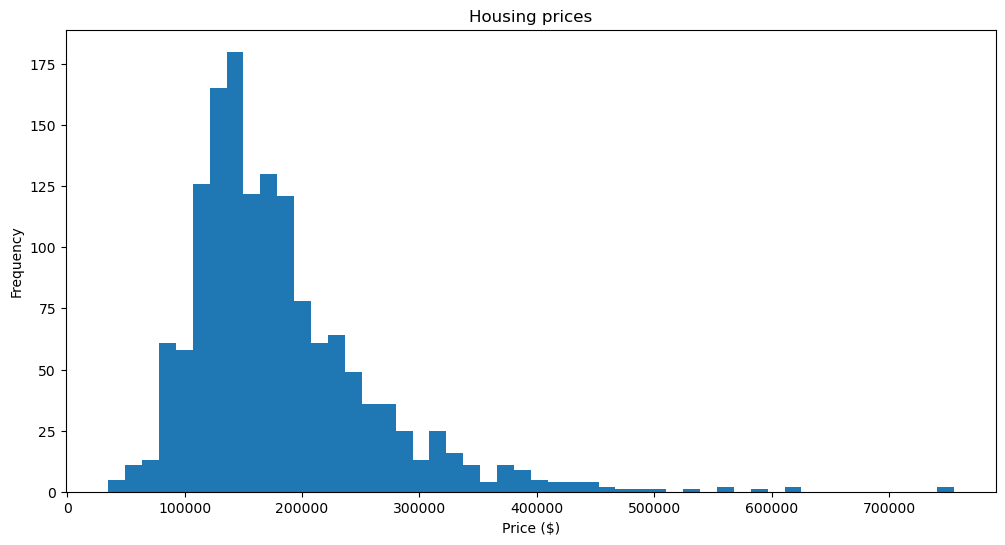

In [7]:
prices = df['SalePrice']
median = np.median(prices)
q3,q1 = np.percentile(prices,[75 ,25])
print(f"The price for the data is: ${median}")
print(f"The Q1 for the data is: ${q1}")
print(f"The Q2 for the data is: ${q3}")
print(f"The IQR for the data is: ${q3-q1}")

df['SalePrice'].plot.hist(bins=50, figsize=(12,6))
plt.title("Housing prices")
plt.xlabel("Price ($)")

# Looking at sales in brackets 

Number of homes under 100000: 114
Number of homes over 100000 under 200000: 911
Number of homes over 200000 under 300000: 320
Number of homes over 300000 under 400000: 87
Number of homes over 400000 under 500000: 19
Number of homes over 500000 under 600000: 5
Number of homes over 600000 under 700000: 2
Number of homes over 700000: 2


C:\Users\mattl\AppData\Local\Temp\ipykernel_29048\3674863320.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((labels), rotation = 90)


Text(0.5, 1.0, 'Number of Houses per Bracket')

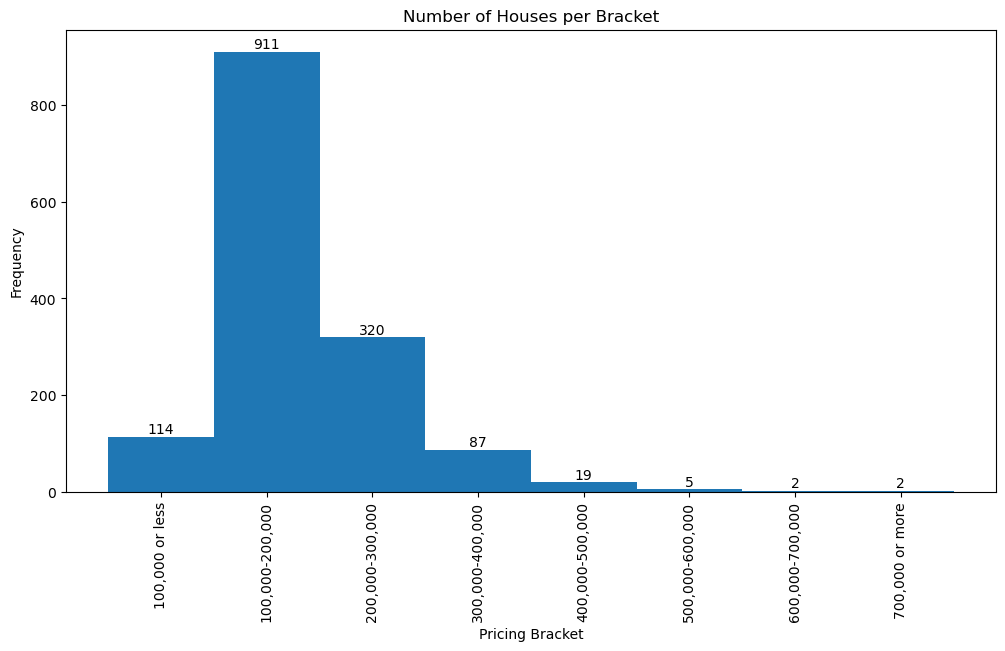

In [8]:
num1,num2,num3,num4,num5,num6,num7,num8 = 0,0,0,0,0,0,0,0
values = []

for i in df['SalePrice']:
  if (i < 100000):
    num1 = num1 + 1
    values.append(1)
  if (i >= 100000 and i < 200000):
    num2 = num2 + 1
    values.append(2)
  if (i >= 200000 and i < 300000):
    num3 = num3 + 1
    values.append(3)
  if(i >= 300000 and i < 400000):
    num4 = num4 + 1
    values.append(4)
  if(i >= 400000 and i < 500000):
    num5 = num5 + 1
    values.append(5)
  if(i >= 500000 and i < 600000):
    num6 = num6 + 1
    values.append(6)
  if(i >= 600000 and i < 700000):
    num7 = num7 + 1
    values.append(7)
  if(i >= 700000):
    num8 = num8 + 1
    values.append(8)

#print(bracket)

print(f"Number of homes under 100000: {num1}")
print(f"Number of homes over 100000 under 200000: {num2}")
print(f"Number of homes over 200000 under 300000: {num3}")
print(f"Number of homes over 300000 under 400000: {num4}")
print(f"Number of homes over 400000 under 500000: {num5}")
print(f"Number of homes over 500000 under 600000: {num6}")
print(f"Number of homes over 600000 under 700000: {num7}")
print(f"Number of homes over 700000: {num8}")

listOfNums = [num1,num2,num3,num4,num5,num6,num7,num8]

fig, ax = plt.subplots(figsize = (8,4))
labels = ['0','100,000 or less' ,'100,000-200,000',  '200,000-300,000', '300,000-400,000', '400,000-500,000', '500,000-600,000', '600,000-700,000', '700,000 or more']
df['tempBracket'] = values
df['tempBracket'].plot.hist(bins=8, figsize=(12,6),  range=(1, 9), align='left')
ax.set_xticklabels((labels), rotation = 90)

rects = ax.patches
  
for rect, label, listOfNum in zip(rects, labels, listOfNums):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+.01, listOfNum, ha='center', va='bottom')


plt.xlabel("Pricing Bracket")
plt.ylabel("Frequency")
plt.title("Number of Houses per Bracket")

# Making less brackets because of limited data

In [13]:
bracket = []

for i in df['SalePrice']:
  if (i < 100000):
    bracket.append("100,000 or less")
  if (i >= 100000 and i < 200000):
    bracket.append("100,000-200,000")
  if (i >= 200000 and i < 300000):
    bracket.append("200,000-300,000")
  if(i >= 300000):
    bracket.append("300,000 or more")


df['Bracket'] = bracket

# Visulaizing data

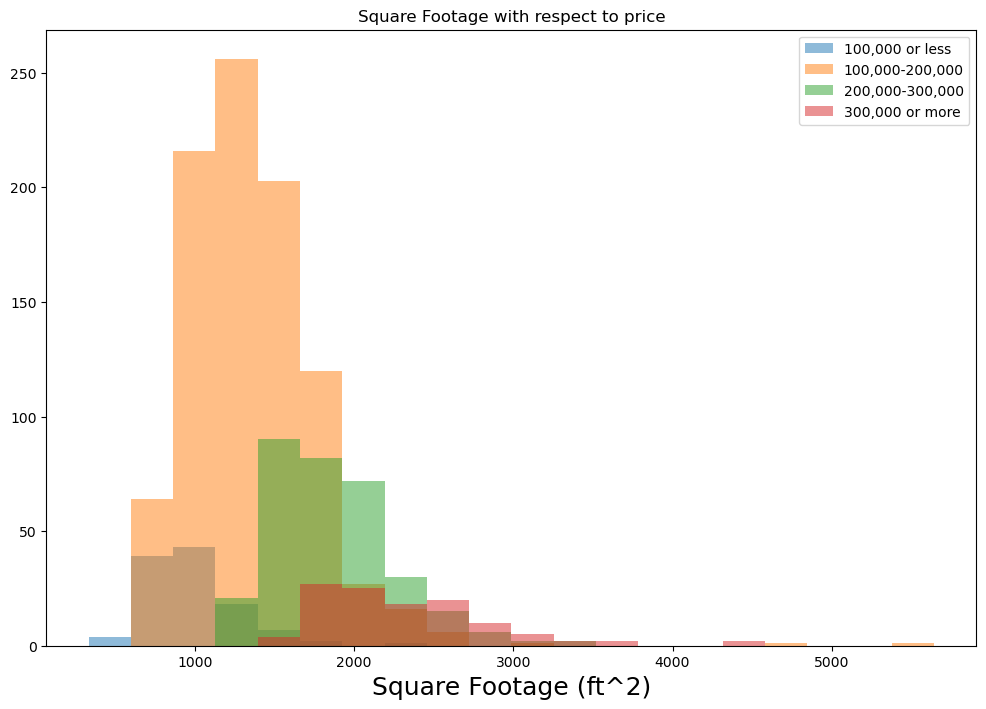

In [14]:
br = df['Bracket'].values
size = df['GrLivArea'].values

plt.figure(figsize=(12,8))
plt.hist(size[br=="100,000 or less"], bins=20, range=(min(size), max(size)), alpha=0.5, label="100,000 or less")
plt.hist(size[br=="100,000-200,000"], bins=20, range=(min(size), max(size)), alpha=0.5, label="100,000-200,000")
plt.hist(size[br=="200,000-300,000"], bins=20, range=(min(size), max(size)), alpha=0.5, label="200,000-300,000")
plt.hist(size[br=="300,000 or more"], bins=20, range=(min(size), max(size)), alpha=0.5, label="300,000 or more")
plt.xlabel('Square Footage (ft^2)', fontsize=18)
plt.title("Square Footage with respect to price")
plt.legend();

In [15]:
# Looking at all the neighborhoods
print(df['Neighborhood'].nunique())
print(df['Neighborhood'].unique())
print(len(df['Neighborhood']))

25
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
1460


# Turning neighbors into a data type the tree can use 

In [18]:
neighborhoodNumeric = []

for i in df['Neighborhood']:
  if i == "CollgCr":
    neighborhoodNumeric.append(1)
  if i == "Veenker":
    neighborhoodNumeric.append(2)
  if i == "Crawfor":
    neighborhoodNumeric.append(3)
  if i == "NoRidge":
    neighborhoodNumeric.append(4)
  if i == "Mitchel":
    neighborhoodNumeric.append(5)
  if i == "Somerst":
    neighborhoodNumeric.append(6)
  if i == "NWAmes":
    neighborhoodNumeric.append(7)
  if i == "OldTown":
    neighborhoodNumeric.append(8)
  if i == "BrkSide":
    neighborhoodNumeric.append(9)
  if i == "Sawyer":
    neighborhoodNumeric.append(10)
  if i == "NridgHt":
    neighborhoodNumeric.append(11)
  if i == "SawyerW":
    neighborhoodNumeric.append(12)
  if i == "IDOTRR":
    neighborhoodNumeric.append(13)
  if i == "MeadowV":
    neighborhoodNumeric.append(14)
  if i == "Timber":
    neighborhoodNumeric.append(15)
  if i == "Gilbert":
    neighborhoodNumeric.append(16)
  if i == "NAmes":
    neighborhoodNumeric.append(17)
  if i == "StoneBr":
    neighborhoodNumeric.append(18)
  if i == "Edwards":
    neighborhoodNumeric.append(19) 
  if i == "ClearCr":
    neighborhoodNumeric.append(20)
  if i == "NPkVill":
    neighborhoodNumeric.append(21)
  if i == "Blmngtn":
    neighborhoodNumeric.append(22)
  if i == "BrDale":
    neighborhoodNumeric.append(23)
  if i == "SWISU":
    neighborhoodNumeric.append(24)
  if i == "Blueste":
    neighborhoodNumeric.append(25)

#print(neighborhoodNumeric)
df['NeighborhoodNumeric'] = neighborhoodNumeric

# Visulaizing data I will use for the tree

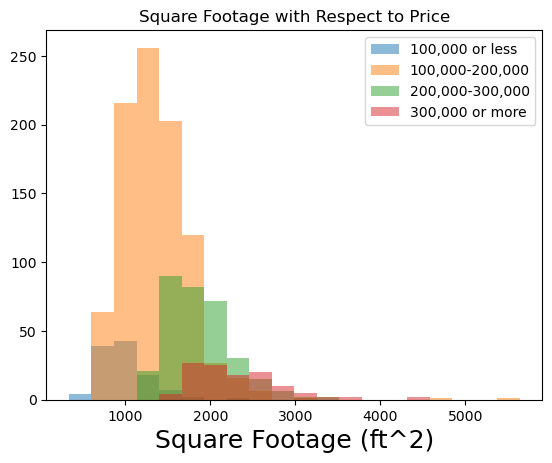

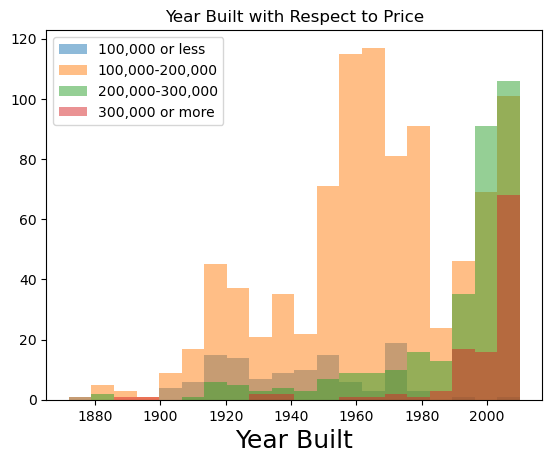

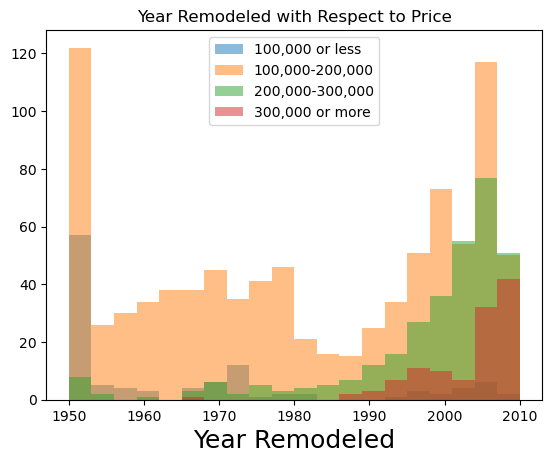

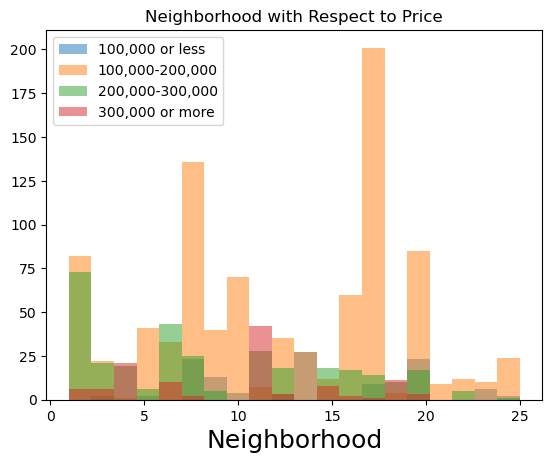

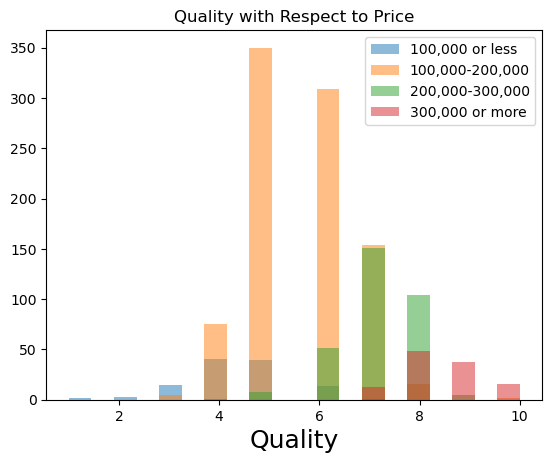

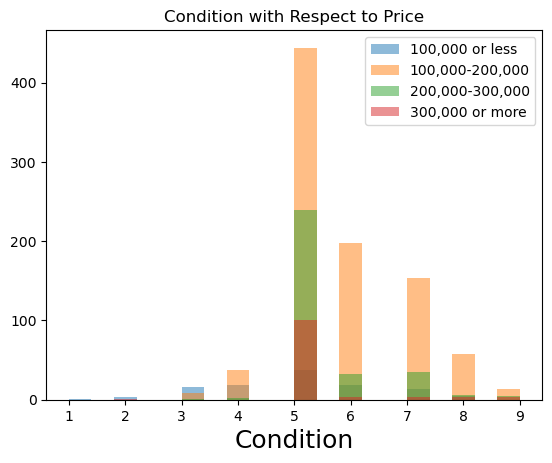

In [19]:
br = df['Bracket'].values
size = df['GrLivArea'].values
built = df['YearBuilt'].values
remodel = df['YearRemodAdd'].values
neighborhood = df['NeighborhoodNumeric'].values
quality  = df['OverallQual'].values
cond = df['OverallCond'].values

plt.figure()
plt.hist(size[br=="100,000 or less"], bins=20, range=(min(size), max(size)), alpha=0.5, label="100,000 or less")
plt.hist(size[br=="100,000-200,000"], bins=20, range=(min(size), max(size)), alpha=0.5, label="100,000-200,000")
plt.hist(size[br=="200,000-300,000"], bins=20, range=(min(size), max(size)), alpha=0.5, label="200,000-300,000")
plt.hist(size[br=="300,000 or more"], bins=20, range=(min(size), max(size)), alpha=0.5, label="300,000 or more")
plt.xlabel('Square Footage (ft^2)', fontsize=18)
plt.title("Square Footage with Respect to Price")
plt.legend();

plt.figure()
plt.hist(built[br=="100,000 or less"], bins=20, range=(min(built), max(built)), alpha=0.5, label="100,000 or less")
plt.hist(built[br=="100,000-200,000"], bins=20, range=(min(built), max(built)), alpha=0.5, label="100,000-200,000")
plt.hist(built[br=="200,000-300,000"], bins=20, range=(min(built), max(built)), alpha=0.5, label="200,000-300,000")
plt.hist(built[br=="300,000 or more"], bins=20, range=(min(built), max(built)), alpha=0.5, label="300,000 or more")
plt.xlabel('Year Built', fontsize=18)
plt.title("Year Built with Respect to Price")
plt.legend();

plt.figure()
plt.hist(remodel[br=="100,000 or less"], bins=20, range=(min(remodel), max(remodel)), alpha=0.5, label="100,000 or less")
plt.hist(remodel[br=="100,000-200,000"], bins=20, range=(min(remodel), max(remodel)), alpha=0.5, label="100,000-200,000")
plt.hist(remodel[br=="200,000-300,000"], bins=20, range=(min(remodel), max(remodel)), alpha=0.5, label="200,000-300,000")
plt.hist(remodel[br=="300,000 or more"], bins=20, range=(min(remodel), max(remodel)), alpha=0.5, label="300,000 or more")
plt.xlabel('Year Remodeled', fontsize=18)
plt.title("Year Remodeled with Respect to Price")
plt.legend();

plt.figure()
plt.hist(neighborhood[br=="100,000 or less"], bins=20, range=(min(neighborhood), max(neighborhood)), alpha=0.5, label="100,000 or less")
plt.hist(neighborhood[br=="100,000-200,000"], bins=20, range=(min(neighborhood), max(neighborhood)), alpha=0.5, label="100,000-200,000")
plt.hist(neighborhood[br=="200,000-300,000"], bins=20, range=(min(neighborhood), max(neighborhood)), alpha=0.5, label="200,000-300,000")
plt.hist(neighborhood[br=="300,000 or more"], bins=20, range=(min(neighborhood), max(neighborhood)), alpha=0.5, label="300,000 or more")
plt.xlabel('Neighborhood', fontsize=18)
plt.title("Neighborhood with Respect to Price")
plt.legend();

plt.figure()
plt.hist(quality[br=="100,000 or less"], bins=20, range=(min(quality), max(quality)), alpha=0.5, label="100,000 or less")
plt.hist(quality[br=="100,000-200,000"], bins=20, range=(min(quality), max(quality)), alpha=0.5, label="100,000-200,000")
plt.hist(quality[br=="200,000-300,000"], bins=20, range=(min(quality), max(quality)), alpha=0.5, label="200,000-300,000")
plt.hist(quality[br=="300,000 or more"], bins=20, range=(min(quality), max(quality)), alpha=0.5, label="300,000 or more")
plt.xlabel('Quality', fontsize=18)
plt.title("Quality with Respect to Price")
plt.legend();

plt.figure()
plt.hist(cond[br=="100,000 or less"], bins=20, range=(min(cond), max(cond)), alpha=0.5, label="100,000 or less")
plt.hist(cond[br=="100,000-200,000"], bins=20, range=(min(cond), max(cond)), alpha=0.5, label="100,000-200,000")
plt.hist(cond[br=="200,000-300,000"], bins=20, range=(min(cond), max(cond)), alpha=0.5, label="200,000-300,000")
plt.hist(cond[br=="300,000 or more"], bins=20, range=(min(cond), max(cond)), alpha=0.5, label="300,000 or more")
plt.xlabel('Condition', fontsize=18)
plt.title("Condition with Respect to Price")
plt.legend();

# Making a new data frame and seperating data

In [ ]:
df1 = df[[ "GrLivArea","YearBuilt", "YearRemodAdd", "NeighborhoodNumeric","OverallQual", "OverallCond", "Bracket"]]
df1 = df1.dropna(axis=0)

x = df1[["GrLivArea","YearBuilt", "YearRemodAdd", "NeighborhoodNumeric","OverallQual","OverallCond"]]
y = df1["Bracket"]

# Seperate training and testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

# Training
clf = DecisionTreeClassifier(max_depth = 7, random_state = 42)

clf.fit(X_train, y_train)

1022
1022
438
438


DecisionTreeClassifier(max_depth=7, random_state=42)

In [21]:
df1

,GrLivArea,YearBuilt,YearRemodAdd,NeighborhoodNumeric,OverallQual,OverallCond,Bracket
0,1710,2003,2003,1,7,5,"200,000-300,000"
1,1262,1976,1976,2,6,8,"100,000-200,000"
2,1786,2001,2002,1,7,5,"200,000-300,000"
3,1717,1915,1970,3,7,5,"100,000-200,000"
4,2198,2000,2000,4,8,5,"200,000-300,000"
...,...,...,...,...,...,...,...
1455,1647,1999,2000,16,6,5,"100,000-200,000"
1456,2073,1978,1988,7,6,6,"200,000-300,000"
1457,2340,1941,2006,3,7,9,"200,000-300,000"
1458,1078,1950,1996,17,5,6,"100,000-200,000"


# Looking for potential correlations

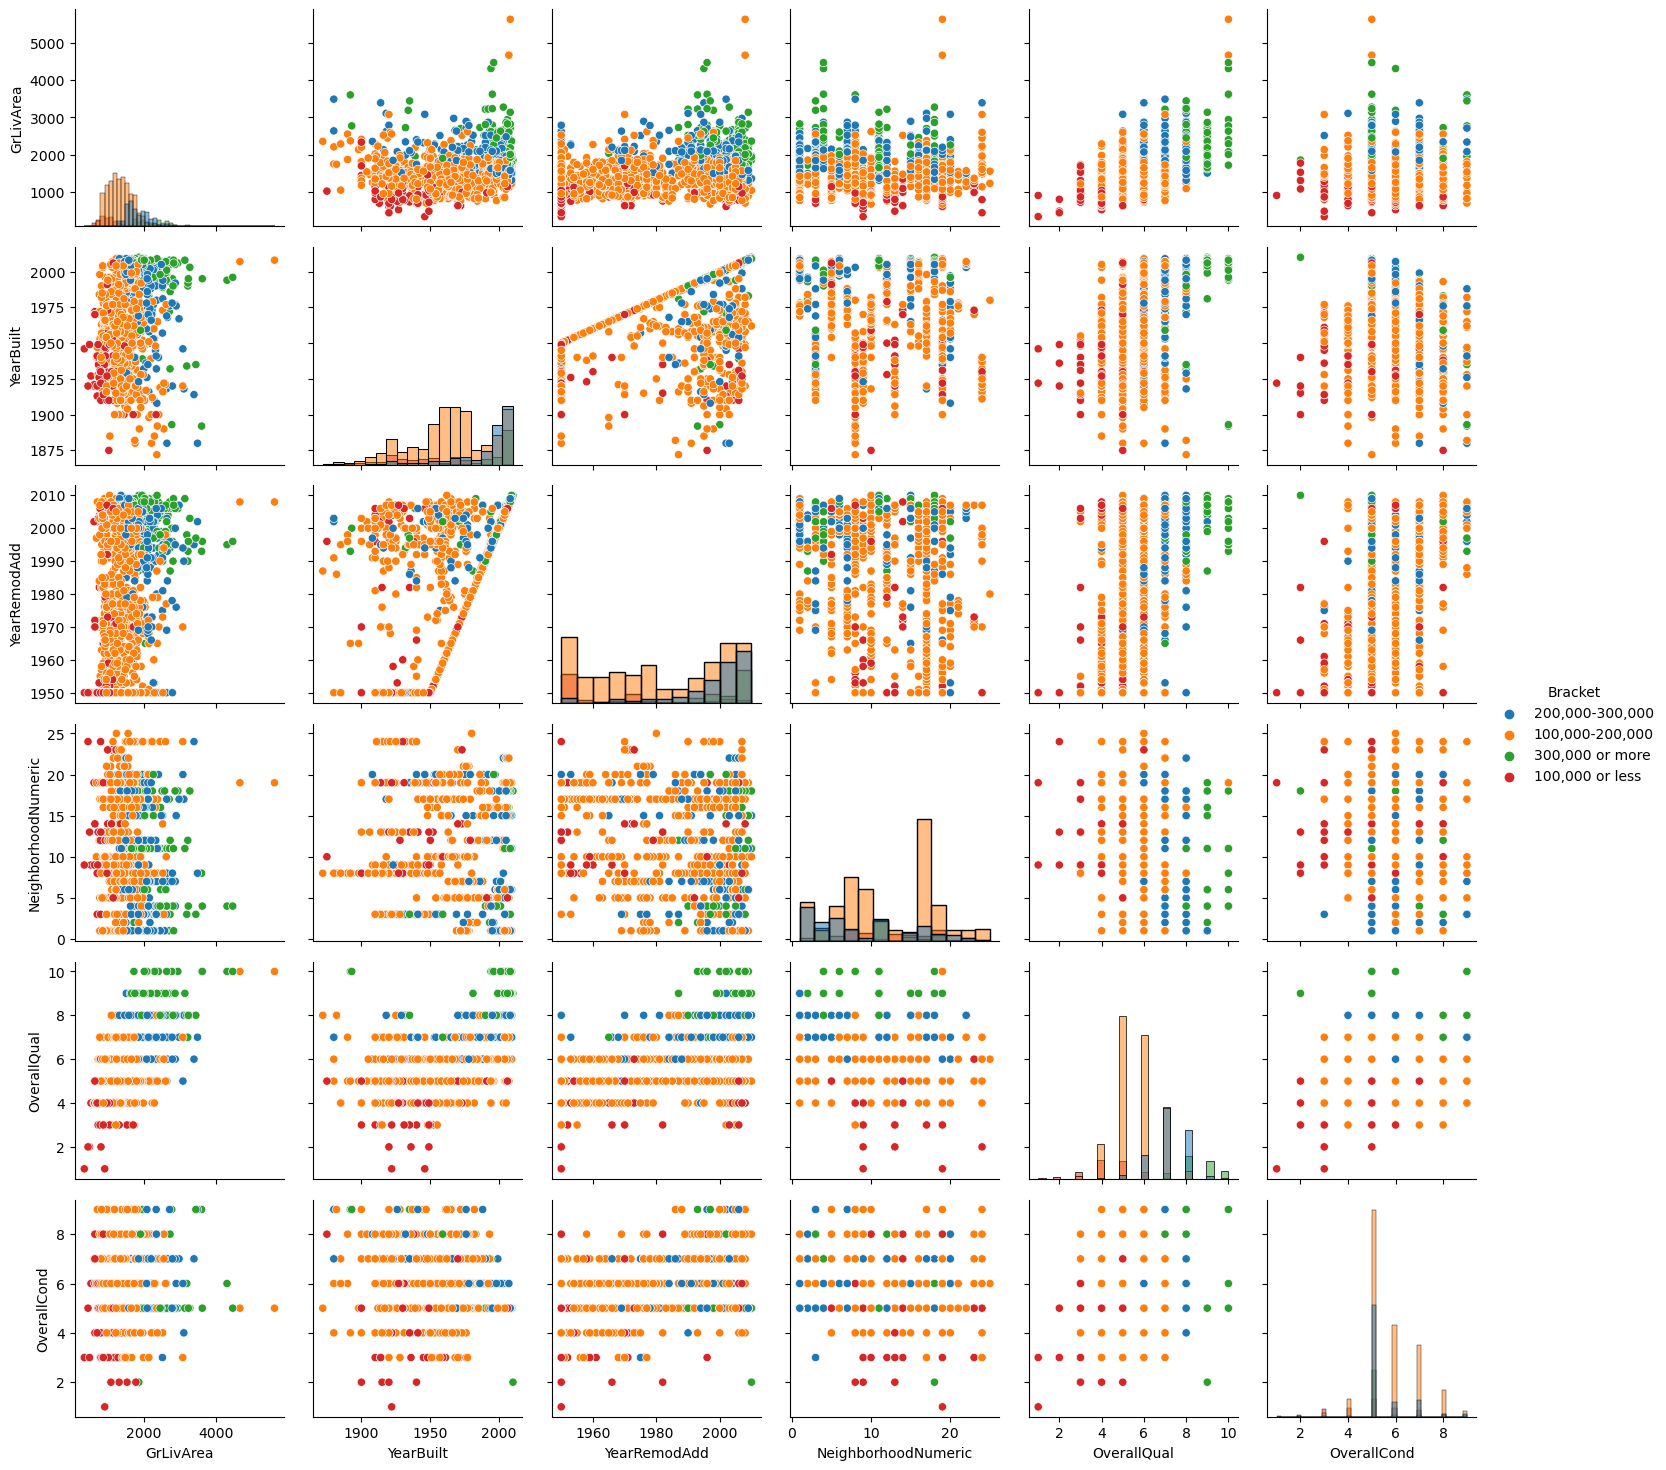

In [22]:
g = sns.PairGrid(df1, hue='Bracket')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Build Tree

We will train using the following features
Index(['GrLivArea', 'YearBuilt', 'YearRemodAdd', 'NeighborhoodNumeric',
       'OverallQual', 'OverallCond', 'Bracket'],
      dtype='object')

Our labels (species) are
['100,000 or less' '100,000-200,000' '200,000-300,000' '300,000 or more']



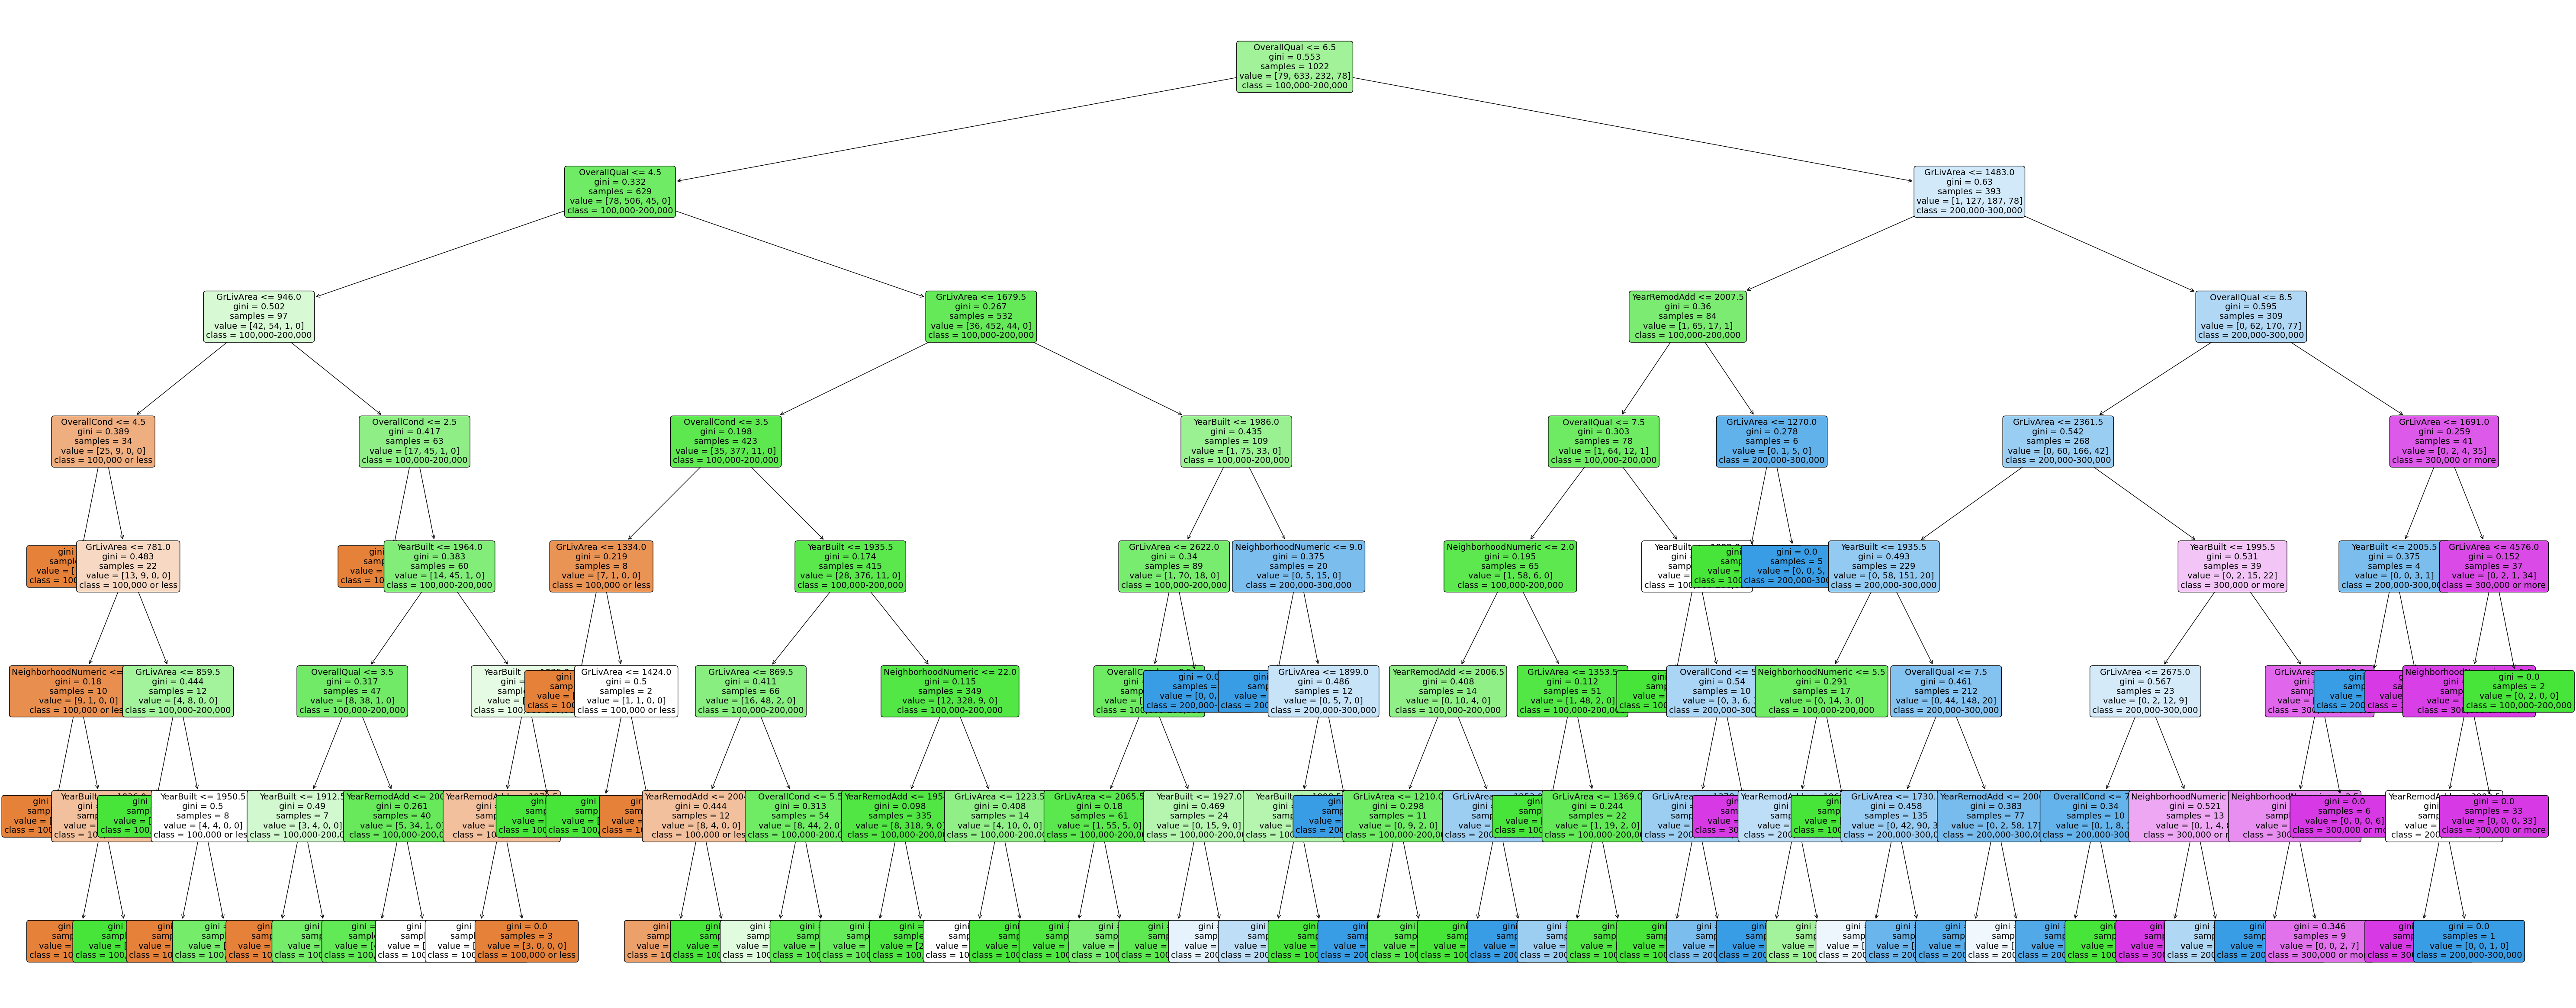

In [23]:
feature_names = df1.columns
labels = np.sort(y.unique())

print("We will train using the following features")
print(feature_names)
print()

print("Our labels (species) are")
print(labels)
print()

plt.figure(figsize=(75,30))

# Create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
# Show the plot
plt.show()

In [24]:
print(labels)

['100,000 or less' '100,000-200,000' '200,000-300,000' '300,000 or more']


In [25]:
test_pred_decision_tree = clf.predict(X_test)

# Create confusion matrix

['100,000 or less' '100,000-200,000' '200,000-300,000' '300,000 or more']


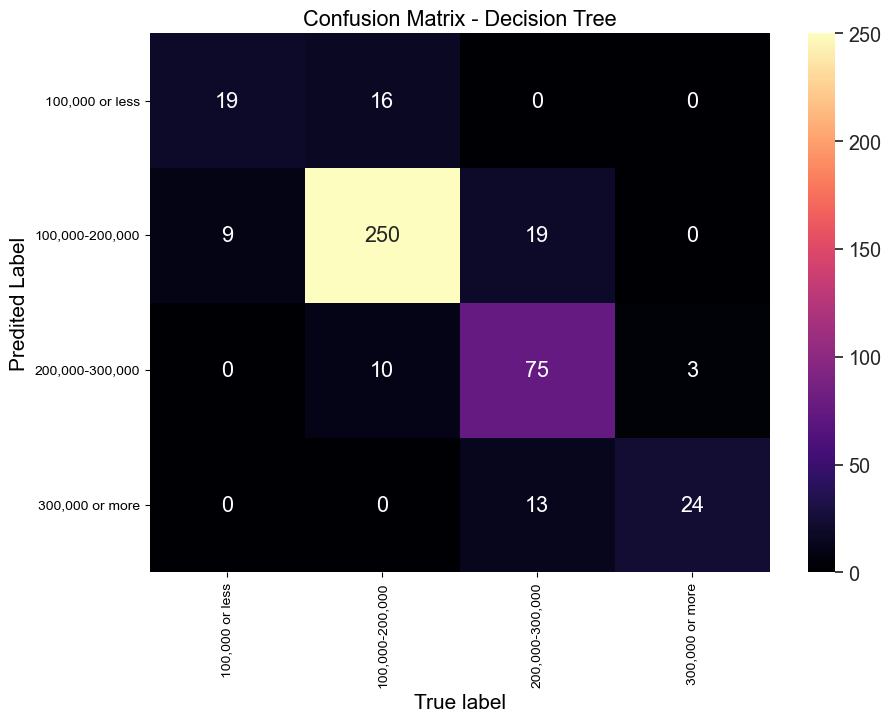

In [26]:
# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)

# Plot the result
fig, ax = plt.subplots(figsize=(10,7))

sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
print(labels)
# Formatting details here
# Set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("True label", fontsize =15)
ax.set_xticklabels(labels,rotation=90)
ax.set_ylabel("Predited Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

# Accuracy 

In [27]:
accuracy = metrics.accuracy_score(y_test, test_pred_decision_tree)

print(f"accuracy: {accuracy:.2f}")

accuracy: 0.84


# Precision

In [28]:
# Get the precision score
precision = metrics.precision_score(y_test, test_pred_decision_tree, average=None)

# Turn it into a dataframe
precision_results = pd.DataFrame(precision, index=labels)

# Rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

,precision
"100,000 or less",0.678571
"100,000-200,000",0.905797
"200,000-300,000",0.700935
"300,000 or more",0.888889
